In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('psid_task_data.txt', header = 'infer', delim_whitespace=True)
df.head()

,ID,age,change_in_fam_comp,year,full_income,full_weights
0,4007,41,0,2001,55616.0,24.971001
1,4007,45,8,2005,62000.0,24.971001
2,4007,36,3,1996,23854.0,10.229000
3,4007,37,0,1997,29304.0,24.971001
4,4007,39,0,1999,35616.0,24.971001


In [8]:
CPI_Data = pd.read_excel('Inflation.xlsx')
CPI_Data = CPI_Data.rename(columns = {'Year': 'year'})
CPI_Data.head()

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,NaN,NaN
1,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,NaN,NaN
2,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,NaN,NaN
3,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,NaN,NaN
4,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7,NaN,NaN


In [9]:
# convert monthly CPI to yearly averages
CPI_Data['Avg'] = CPI_Data[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean(axis = 1)
CPI_Data = CPI_Data[['year', 'Avg']]
CPI_Data.head()

,year,Avg
0,1913,9.883333
1,1914,10.016667
2,1915,10.108333
3,1916,10.883333
4,1917,12.825000


In [10]:
# merge household income and CPI data
df = df.merge(CPI_Data, on = 'year')
df = df.rename(columns = {'Avg':'CPI_for_year'})
df.head()

,ID,age,change_in_fam_comp,year,full_income,full_weights,CPI_for_year
0,4007,41,0,2001,55616.0,24.971001,177.066667
1,4008,36,1,2001,30160.0,15.433000,177.066667
2,4033,26,5,2001,27000.0,11.175000,177.066667
3,4034,25,1,2001,23000.0,9.931000,177.066667
4,4035,24,0,2001,20000.0,17.704000,177.066667


In [11]:
def CPI_for_year(year):
    return CPI_Data[CPI_Data['year'] == year].iloc[0]['Avg']
CPI_for_year(2010)

218.05550000000002

In [12]:
# adjust to 2010 Dollars
df['real_full_income'] = df['full_income'] * CPI_for_year(2010) / df['CPI_for_year']
df.head()

,ID,age,change_in_fam_comp,year,full_income,full_weights,CPI_for_year,real_full_income
0,4007,41,0,2001,55616.0,24.971001,177.066667,68490.444398
1,4008,36,1,2001,30160.0,15.433000,177.066667,37141.682304
2,4033,26,5,2001,27000.0,11.175000,177.066667,33250.179782
3,4034,25,1,2001,23000.0,9.931000,177.066667,28324.227221
4,4035,24,0,2001,20000.0,17.704000,177.066667,24629.762801


In [13]:
df = df[df['change_in_fam_comp'] == 0]
df = df[['year','full_weights','real_full_income']]
df

,year,full_weights,real_full_income
0,2001,24.971001,68490.444398
4,2001,17.704000,24629.762801
5,2001,0.000000,44826.168298
6,2001,19.566000,112065.420745
10,2001,22.219999,92361.610505
13,2001,12.363000,92361.610505
15,2001,17.927000,4433.357304
16,2001,14.282000,24280.020169
17,2001,14.400000,38422.429970
18,2001,23.445999,22553.473797


In [14]:
# weighted average function
def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()
    
final_data = df.groupby('year').apply(wavg, 'real_full_income', 'full_weights')
final_data

year
1982    37347.345117
1983    40884.321863
1984    40732.504341
1985    42718.125735
1986    45861.395634
1987    47941.212709
1988    50874.408644
1989    49310.956308
1990    49359.925860
1991    50927.597115
1992    52380.975676
1993    52964.786831
1994    58305.317130
1995    58221.047885
1996    60066.577692
1997    63190.455730
1999    72794.166166
2001    79591.179950
2003    77537.232524
2005    76701.622400
2007    74257.501824
2009    75129.248750
2011    69657.692003
2013    70995.970546
2015    69823.687269
dtype: float64

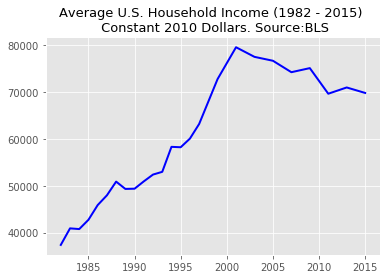

In [15]:
plt.style.use('ggplot')
plt.plot(final_data, color='b', lw=2.0)
plt.title('Average U.S. Household Income (1982 - 2015) \n Constant 2010 Dollars. Source:BLS', size=13)
plt.show()